In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, roc_curve

In [2]:
dtypes = {'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float32',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float32',
        'AVProductsEnabled':                                    'float32',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float32',
        'GeoNameIdentifier':                                    'float32',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float32',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float32',
        'IeVerIdentifier':                                      'float32',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float32',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float32',
        'Census_ProcessorManufacturerIdentifier':               'float32',
        'Census_ProcessorModelIdentifier':                      'float32',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float32',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float32',
        'Census_IsFlightsDisabled':                             'float32',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float32',
        'Census_FirmwareManufacturerIdentifier':                'float32',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float32',
        'Census_IsVirtualDevice':                               'float32',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float32',
        'Wdft_IsGamer':                                         'float32',
        'Wdft_RegionIdentifier':                                'float32',
        'HasDetections':                                        'int8'}

In [2]:
df = pd.read_csv('train.csv', low_memory=True)
#df = pd.read_csv('train.csv',dtype=dtypes, low_memory=True)

C:\Users\mathg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
columncounts = df.describe(include='all').loc[['count']]/df.shape[0]
missingcolumns = columncounts.columns[(columncounts < .75).any(axis=0)]
df_reduce = df.drop(columns=missingcolumns)
df_nonan = df_reduce.dropna()
df = df_nonan

In [4]:
df_y = df['HasDetections'].copy()
df=df.drop(columns='HasDetections')
df=df.drop(columns='MachineIdentifier')
df_y.value_counts(normalize=True)

1    0.50692
0    0.49308
Name: HasDetections, dtype: float64

# AntiVirus Only Aggregate

In [5]:
AVVar_Agg = ['EngineVersion', 'AppVersion', 'AvSigVersion','AVProductStatesIdentifier']
df_AV_agg =df[AVVar_Agg].copy()

In [6]:
#df_AV_agg['AvSigVersion']=df_AV_agg['AvSigVersion'].str.replace('.','')
for col in AVVar_Agg[0:3] :
    df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')
    df_AV_agg[col]=df_AV_agg[col].astype(float)

<ipython-input-6-05610dbbc070>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_AV_agg[col]=df_AV_agg[col].str.replace('[.,&,#,x,;]','')


In [7]:
oldlength = np.zeros(len(AVVar_Agg))
newlength = np.zeros(len(AVVar_Agg))
keptvals = []
threshold = .99
count = 0
df_len = len(df_AV_agg)
ones= np.ones(df_len)

for col in AVVar_Agg :
    temp = df_AV_agg[col]
    temp_unique = df_AV_agg[col].unique()
    oldlength[count] = len(temp_unique)
    print(oldlength[count])
    
    if len(temp_unique) > 10 :
        cumcounts = 0
        temp_counts = temp.value_counts(normalize=True)
        temp_column = np.zeros(len(temp))
        
        for i in range(0,len(temp_counts)):
            cumcounts += temp_counts.values[i]
            #print(cumcounts)
            index = float(temp_counts.index[i])
            temp_column += ones*(temp==index)*index

            if cumcounts > threshold :
                break
        
        temp_column += ones*(temp_column == 0)*-1
        df_AV_agg[col] = temp_column
        
    newlength[count] = len(df_AV_agg[col].unique())
    print(newlength[count])
    count += 1    

60.0
9.0
104.0
28.0
7346.0
1772.0
23107.0
1320.0


# AntiVirus Variables Only

In [23]:
AVVar = ['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 
               'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'IsProtected', 'SMode', 
               'Firewall', 'UacLuaenable', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_IsSecureBootEnabled']
df_AV = df[AVVar].copy()
df_AV[AVVar_Agg] = df_AV_agg
#df_AV['AVProductStatesIdentifier'] = df_AV_agg['AVProductStatesIdentifier']

In [24]:
ohe = OneHotEncoder(categories='auto').fit(df_AV)
df_AV_ohe = ohe.transform(df_AV)
df_AV_ohe_columns = ohe.get_feature_names()

In [18]:
#Without Aggregated Data
len(df_AV_ohe_columns)

30674

In [39]:
#With Partial Aggregated Data
len(df_AV_ohe_columns)

8887

In [12]:
#With Aggregated Data
len(df_AV_ohe_columns)

3186

In [12]:
cv_accs = np.zeros((5,2))
cv_roc = np.zeros((5,2))

kfold = StratifiedKFold(5, shuffle=True, random_state=869)

i = 0
for train_index,test_index in kfold.split(df_AV_ohe, df_y):

#X_train_train, X_holdout, y_train_train, y_holdout = train_test_split(df_AV_ohe, df_y, test_size=0.2, random_state=842)
    X_train_train = df_AV_ohe[train_index,:]
    X_holdout = df_AV_ohe[test_index,:]
    y_train_train = df_y.iloc[train_index]
    y_holdout = df_y.iloc[test_index]
    
    y_baseline = np.ones(len(y_holdout))
    #y_baselinepreds = np.zeros((len(df_y),2))
    #y_baselinepreds[:,1] = np.ones((len(df_y)))
    
    cv_accs[i,0] = accuracy_score(y_holdout, y_baseline)
    cv_roc[i,0] = roc_auc_score(y_holdout, y_baseline)
    
    lr = LogisticRegression(max_iter=35000)
    lr.fit(X_train_train, y_train_train)
        
    cv_accs[i,1] = accuracy_score(y_holdout, lr.predict(X_holdout))
    cv_roc[i,1] = roc_auc_score(y_holdout, lr.predict(X_holdout))
            
    i  = i + 1

In [13]:
print(cv_accs)
print(cv_roc)

[[0.50691935 0.60233282]
 [0.50691935 0.60221514]
 [0.50691935 0.60273459]
 [0.50692004 0.60303123]
 [0.5069197  0.60274685]]
[[0.5        0.60031045]
 [0.5        0.60019322]
 [0.5        0.60072885]
 [0.5        0.60100465]
 [0.5        0.60072215]]


In [66]:
print(np.mean(cv_accs,axis=0))
print(np.mean(cv_roc,axis=0))

[0.50691956 0.60261213]
[0.5        0.60059186]


In [18]:
lr.intercept_

array([-0.74539459])

In [78]:
score_df = pd.DataFrame({'feature':df_AV_ohe_columns,
                            'coefficient': lr.coef_[0]})

pd.set_option('display.max_rows', None)
score_df.sort_values('coefficient',ascending=False)

,feature,coefficient
3039,x7_63682.0,2.184366
3038,x7_63554.0,2.096867
2484,x7_43667.0,1.974878
3035,x7_63295.0,1.920367
2334,x7_35087.0,1.854979
2516,x7_44111.0,1.838252
2501,x7_43882.0,1.833846
3036,x7_63390.0,1.833354
2108,x7_16592.0,1.795059
2476,x7_43557.0,1.704043


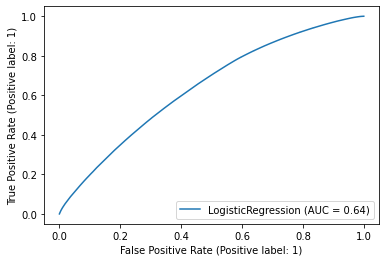

In [34]:
plot_roc_curve(lr,df_AV_ohe,df_y)
plt.show()

In [35]:
y_prob = lr.predict_proba(df_AV_ohe)
y_prob

array([[0.3608511 , 0.6391489 ],
       [0.39425364, 0.60574636],
       [0.42364909, 0.57635091],
       ...,
       [0.44784336, 0.55215664],
       [0.87911494, 0.12088506],
       [0.67713273, 0.32286727]])

In [39]:
fprs, tprs, thresholds = roc_curve(df_y, y_prob[:,1])

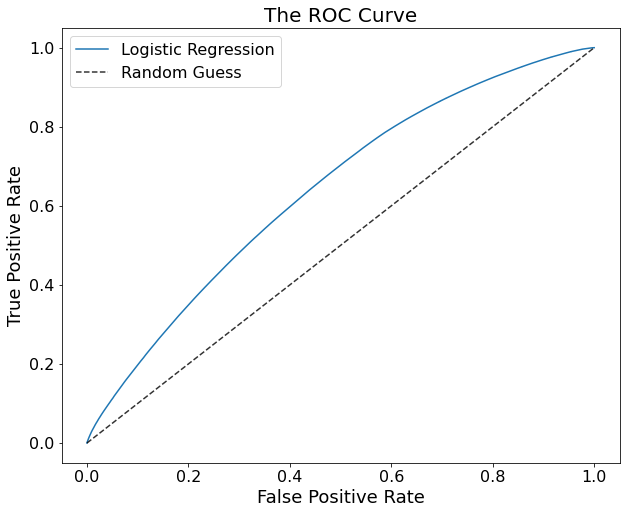

In [41]:
plt.figure(figsize=(10,8))

plt.plot(fprs, tprs, label="Logistic Regression")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--', alpha=.8, label="Random Guess")

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.legend(fontsize=16)

plt.title("The ROC Curve", fontsize=20)

plt.show()

In [42]:
tree_clf = DecisionTreeClassifier(max_depth = 10)
tree_clf.fit(X_train_train, y_train_train)

DecisionTreeClassifier(max_depth=10)

In [48]:
from sklearn.inspection import permutation_importance

In [59]:
result = permutation_importance(tree_clf,df_AV_ohe[0:10**3,:].toarray(), df_y[0:10**3])

In [64]:
result.importances_mean

array([0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.0026])

In [65]:
result_perm_df = pd.DataFrame({'feature':df_AV_ohe_columns,
                            'importance': result.importances_mean})

result_perm_df.sort_values('importance',ascending=False).head(5)

,feature,importance
2806,x7_53447.0,0.0758
10,x1_11151001.0,0.0680
11,x1_11152001.0,0.0278
2629,x7_47238.0,0.0062
31,x2_418180618062.0,0.0052


In [58]:
score_df = pd.DataFrame({'feature':df_AV_ohe_columns,
                            'importance_score': tree_clf.feature_importances_})

score_df.sort_values('importance_score',ascending=False).head(5)

,feature,importance_score
2806,x7_53447.0,0.473315
10,x1_11151001.0,0.132871
11,x1_11152001.0,0.083382
32,x2_418180718075.0,0.040643
3039,x7_63682.0,0.026651


In [43]:
y_prob_tree = tree_clf.predict_proba(df_AV_ohe)
y_prob_tree

array([[0.38694324, 0.61305676],
       [0.31955567, 0.68044433],
       [0.38694324, 0.61305676],
       ...,
       [0.43537134, 0.56462866],
       [0.75007279, 0.24992721],
       [0.65057379, 0.34942621]])

In [44]:
fprs_tree, tprs_tree, thresholds_tree = roc_curve(df_y, y_prob_tree[:,1])

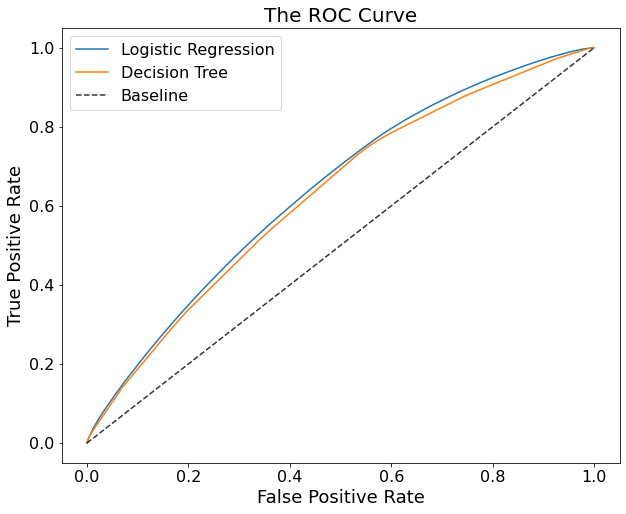

In [67]:
plt.figure(figsize=(10,8))

plt.plot(fprs, tprs, label="Logistic Regression")
plt.plot(fprs_tree, tprs_tree, label="Decision Tree")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), 'k--', alpha=.8, label="Baseline")

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.legend(fontsize=16)

plt.title("The ROC Curve", fontsize=20)

plt.show()